# INSURANCE CLAIM FRAUD DETECTION

### Problem Statement
 #### Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

#### In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

#### So in this context, we will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [4]:
#LOAD THE DATASET
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [5]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [8]:
df.shape


(1000, 40)

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [13]:
#dropping the columns which have missing values
df.drop('_c39',axis=1, inplace=True)
# droping certain columns which doesnt make any impact on model building
df.drop(['policy_number', 'incident_location'],axis=1,inplace=True)

In [14]:
# grouping numerical variables
num_vars=[y for y in df.columns if df[y].dtypes != 'O']
df[num_vars]

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [15]:
# checking for any null values present in the dataset
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [17]:
# checking the value_counts of the certain features having symbol ?
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [20]:
# replacing the character ? with mean of the feature
df['colission_type']=df['collision_type'].replace(
    to_replace='?', 
    value='Rear Collision', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['property_damage']=df['property_damage'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['police_report_available']=df['police_report_available'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')

In [21]:
df.head

<bound method NDFrame.head of      months_as_customer  age policy_bind_date policy_state policy_csl  \
0                   328   48       17-10-2014           OH    250/500   
1                   228   42       27-06-2006           IN    250/500   
2                   134   29       06-09-2000           OH    100/300   
3                   256   41       25-05-1990           IL    250/500   
4                   228   44       06-06-2014           IL   500/1000   
..                  ...  ...              ...          ...        ...   
995                   3   38       16-07-1991           OH   500/1000   
996                 285   41       05-01-2014           IL    100/300   
997                 130   34       17-02-2003           OH    250/500   
998                 458   62       18-11-2011           IL   500/1000   
999                 456   60       11-11-1996           OH    250/500   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0              

In [22]:
import datetime

df['policy_year'] = pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df['incident_year'] = pd.to_datetime(df.incident_date, format='%d-%m-%Y')
df['policy_year'] = df['policy_year'].dt.strftime('%Y')
df['incident_year'] = df['incident_year'].dt.strftime('%Y')

In [23]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

# grouping categorical variables 
cat_vars = [x for x in df.columns if df[x].dtypes == 'O']
df[cat_vars]
cat_vars.remove('policy_year')

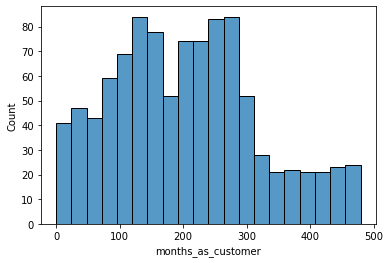

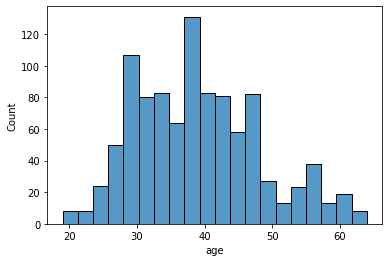

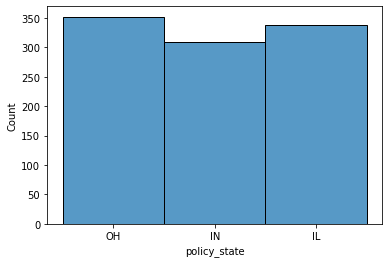

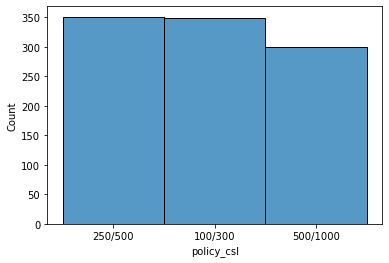

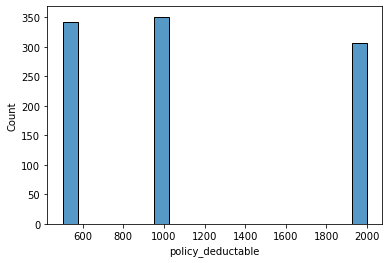

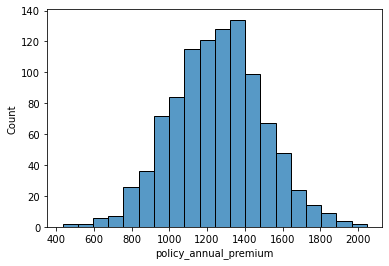

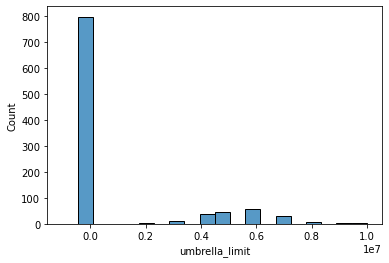

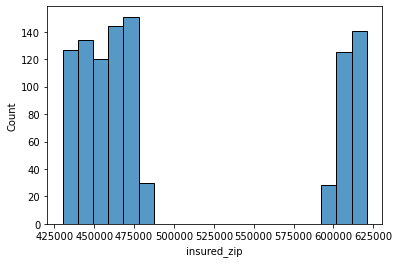

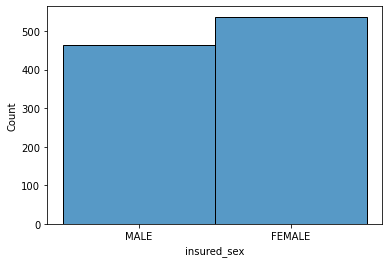

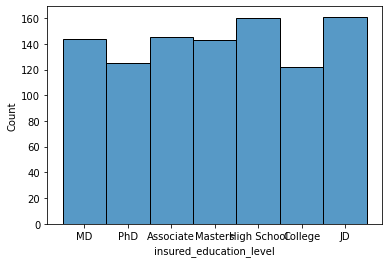

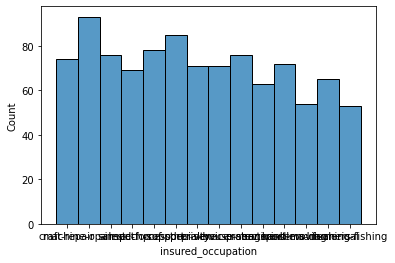

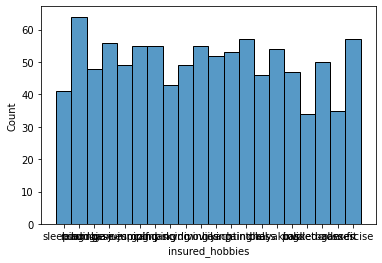

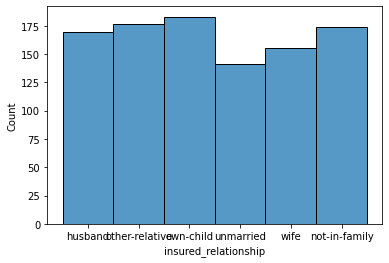

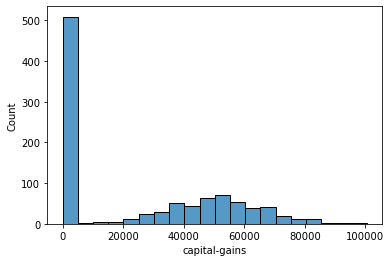

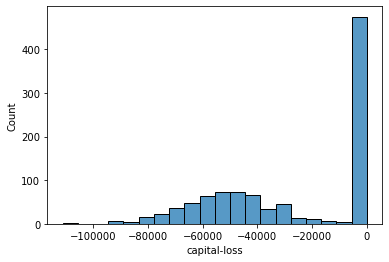

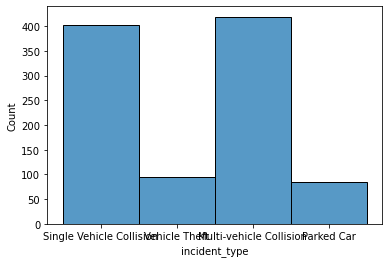

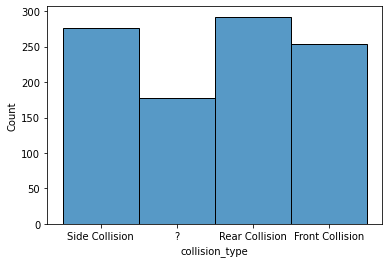

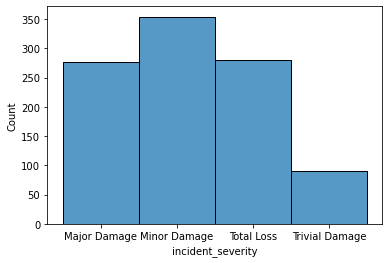

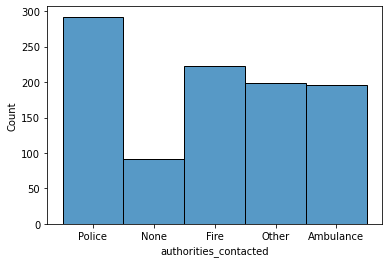

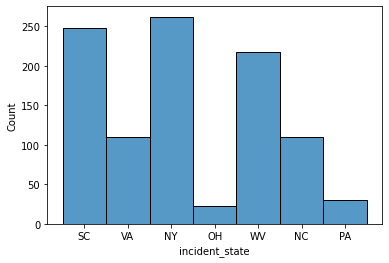

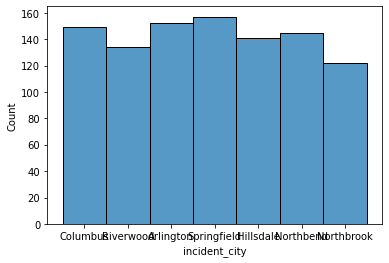

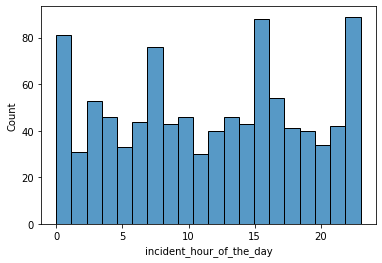

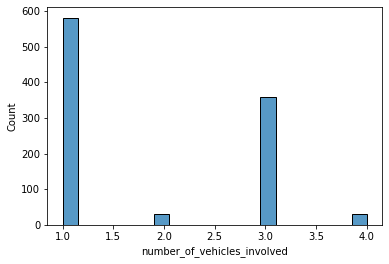

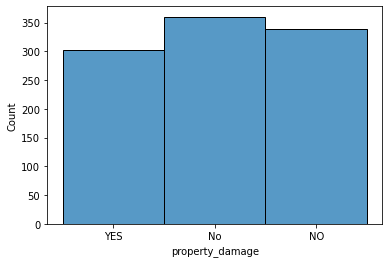

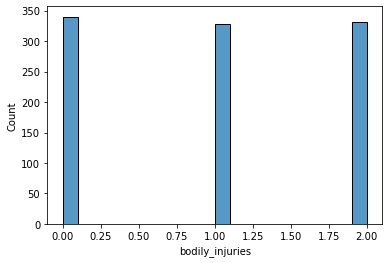

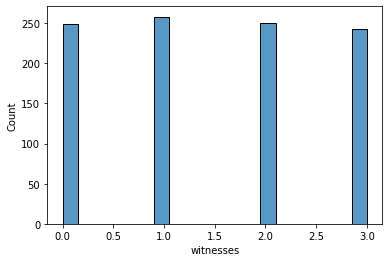

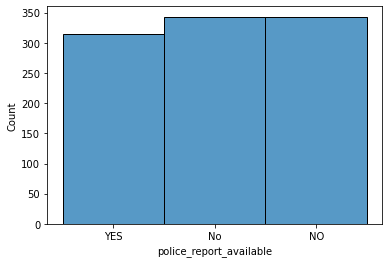

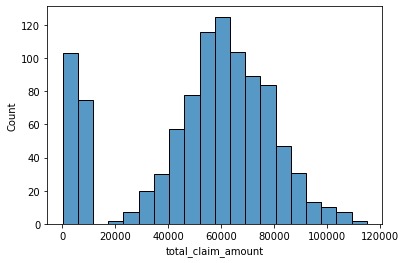

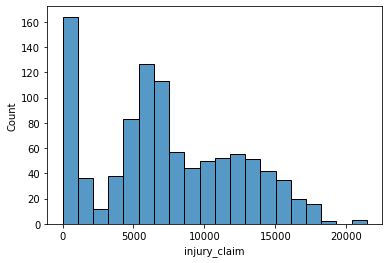

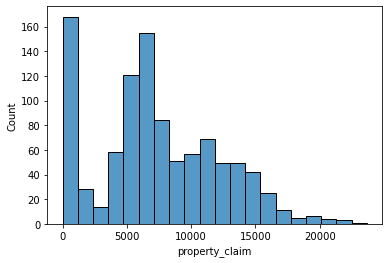

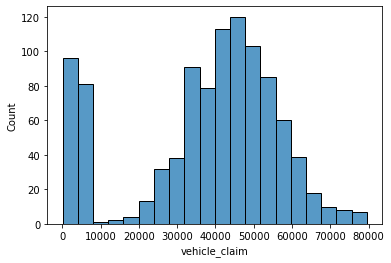

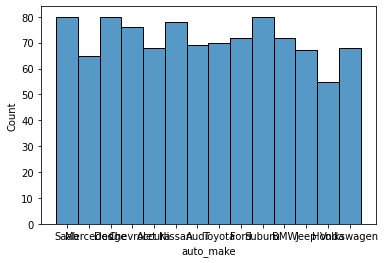

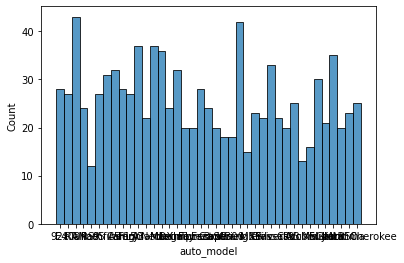

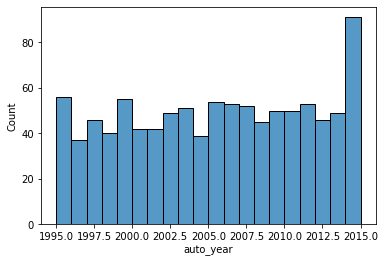

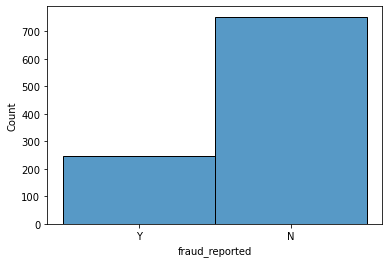

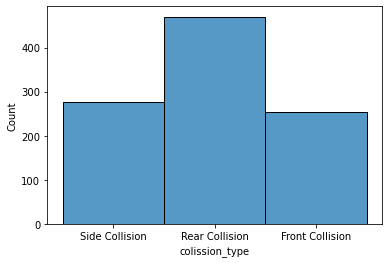

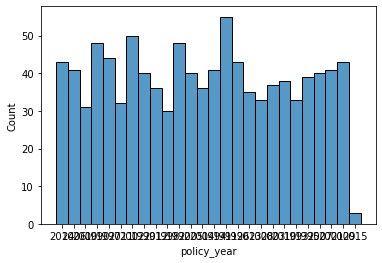

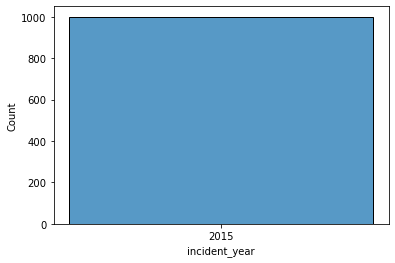

In [24]:
# checking for any skewness in the dataset

for i in df.columns:
    sns.histplot(df[i],bins=20)
    plt.show()

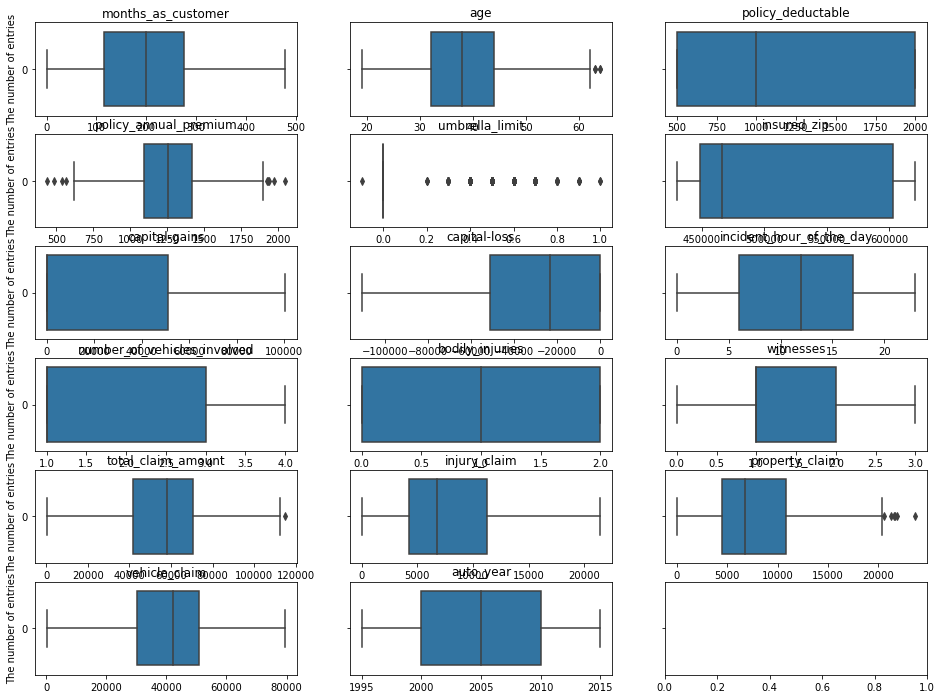

In [25]:
# check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=num_vars, rows=6, cols=3, subtitle='Boxplots before deleting outliers')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


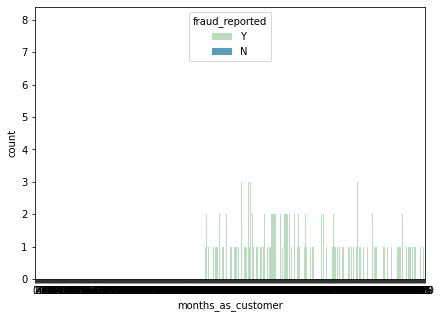

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


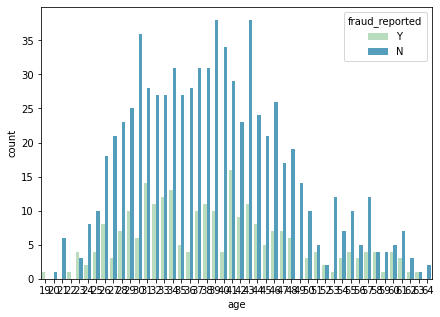

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


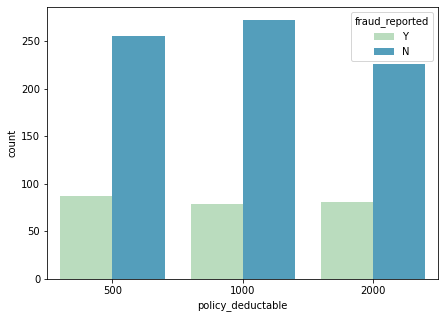

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


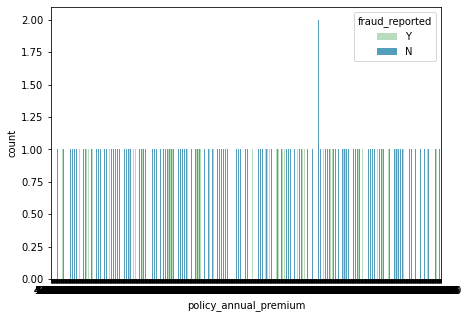

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


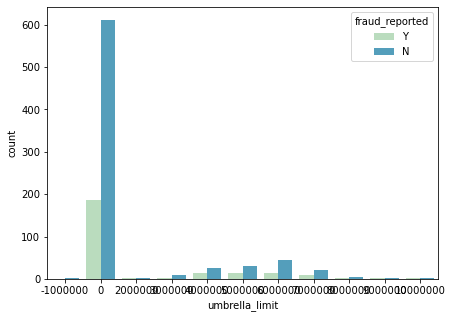

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


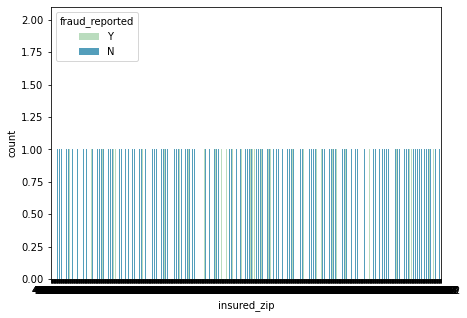

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


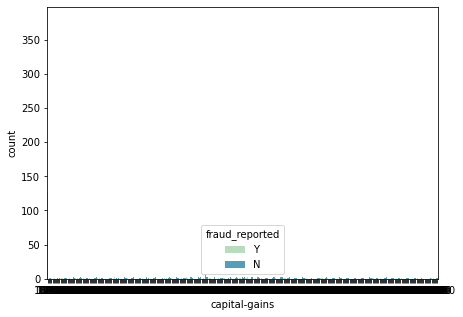

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


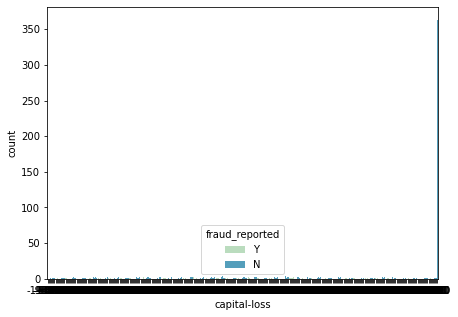

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


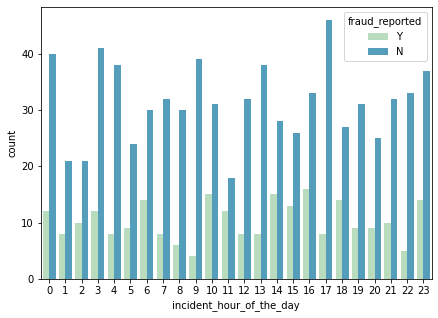

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


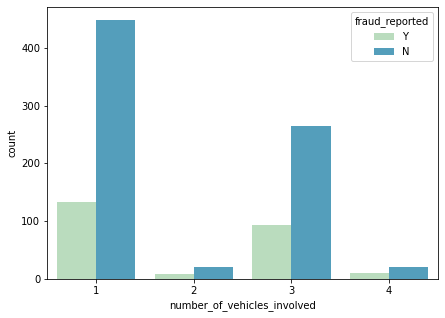

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


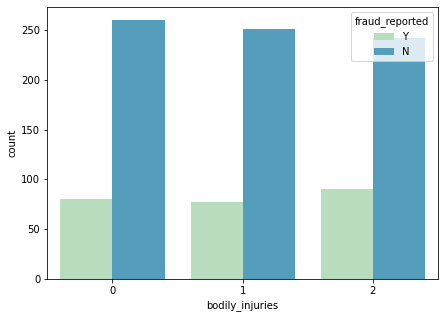

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


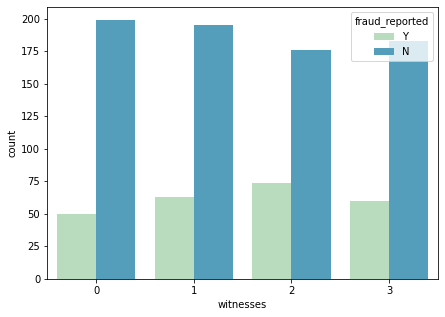

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


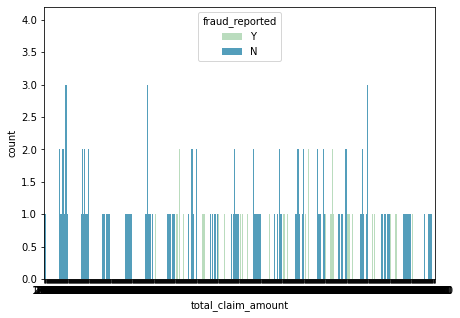

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


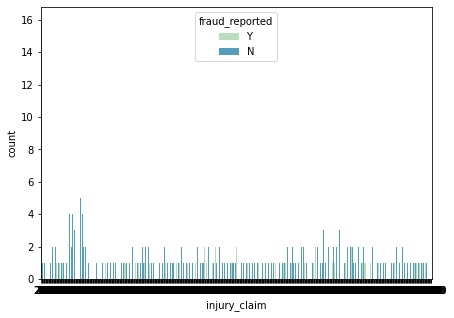

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


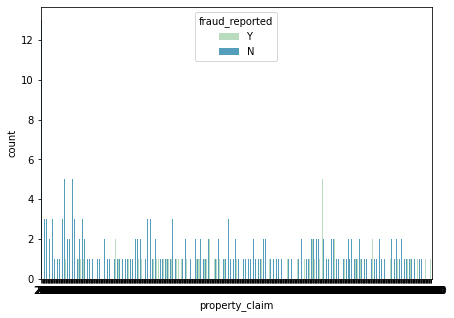

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


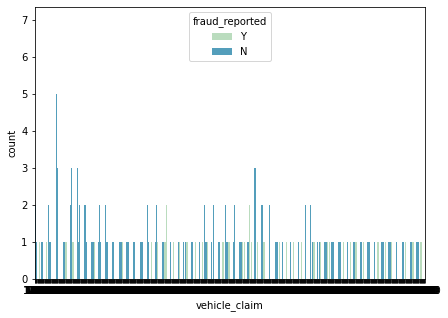

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


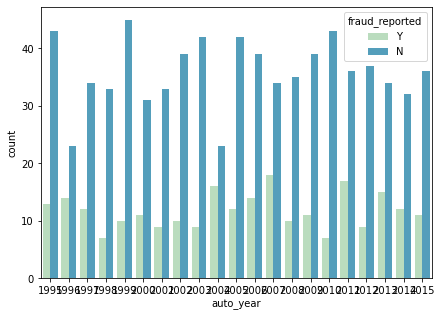

In [26]:
# plotting countplot

for i in num_vars:
    plt.figure(figsize=(7,5))
    sns.countplot(df[i],hue=df['fraud_reported'],palette='GnBu')
    plt.show()

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

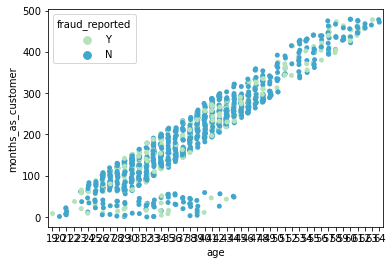

In [27]:
sns.stripplot(x='age',y='months_as_customer',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='months_as_customer', ylabel='total_claim_amount'>

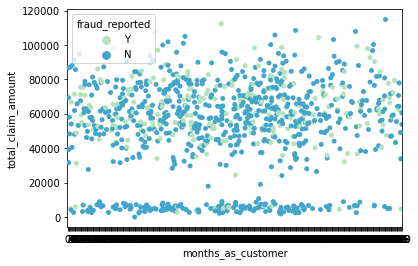

In [28]:
sns.stripplot(x='months_as_customer',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='months_as_customer', ylabel='injury_claim'>

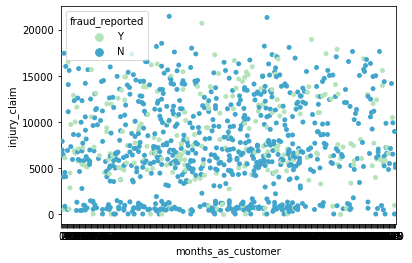

In [29]:
sns.stripplot(x='months_as_customer',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='months_as_customer', ylabel='property_claim'>

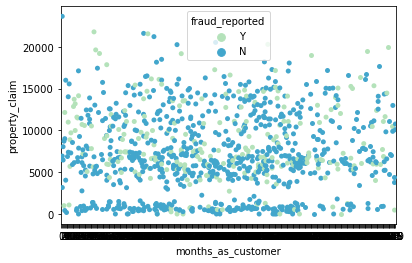

In [30]:
sns.stripplot(x='months_as_customer',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='months_as_customer', ylabel='vehicle_claim'>

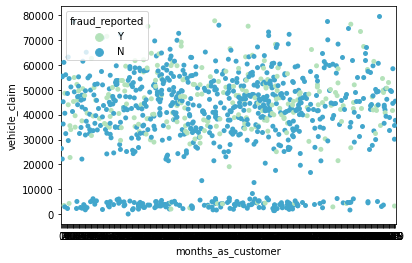

In [31]:
sns.stripplot(x='months_as_customer',y='vehicle_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='incident_type', ylabel='injury_claim'>

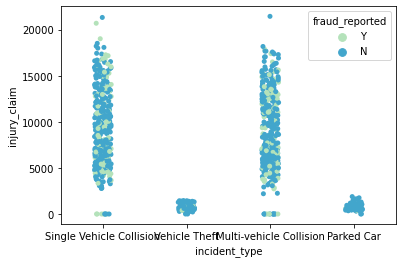

In [32]:
sns.stripplot(x='incident_type',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='total_claim_amount', ylabel='injury_claim'>

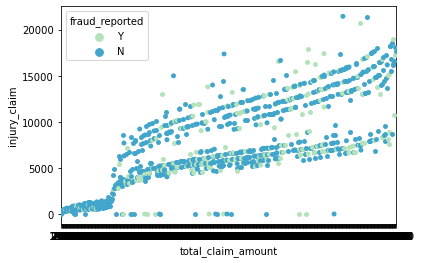

In [33]:
sns.stripplot(x='total_claim_amount',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='total_claim_amount', ylabel='property_claim'>

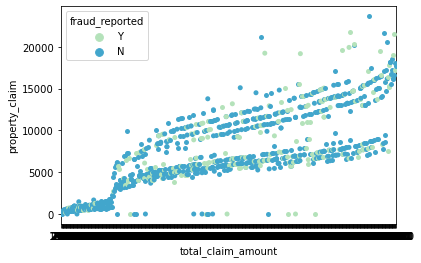

In [34]:
sns.stripplot(x='total_claim_amount',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

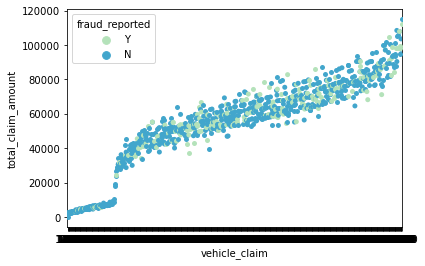

In [35]:
sns.stripplot(x='vehicle_claim',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

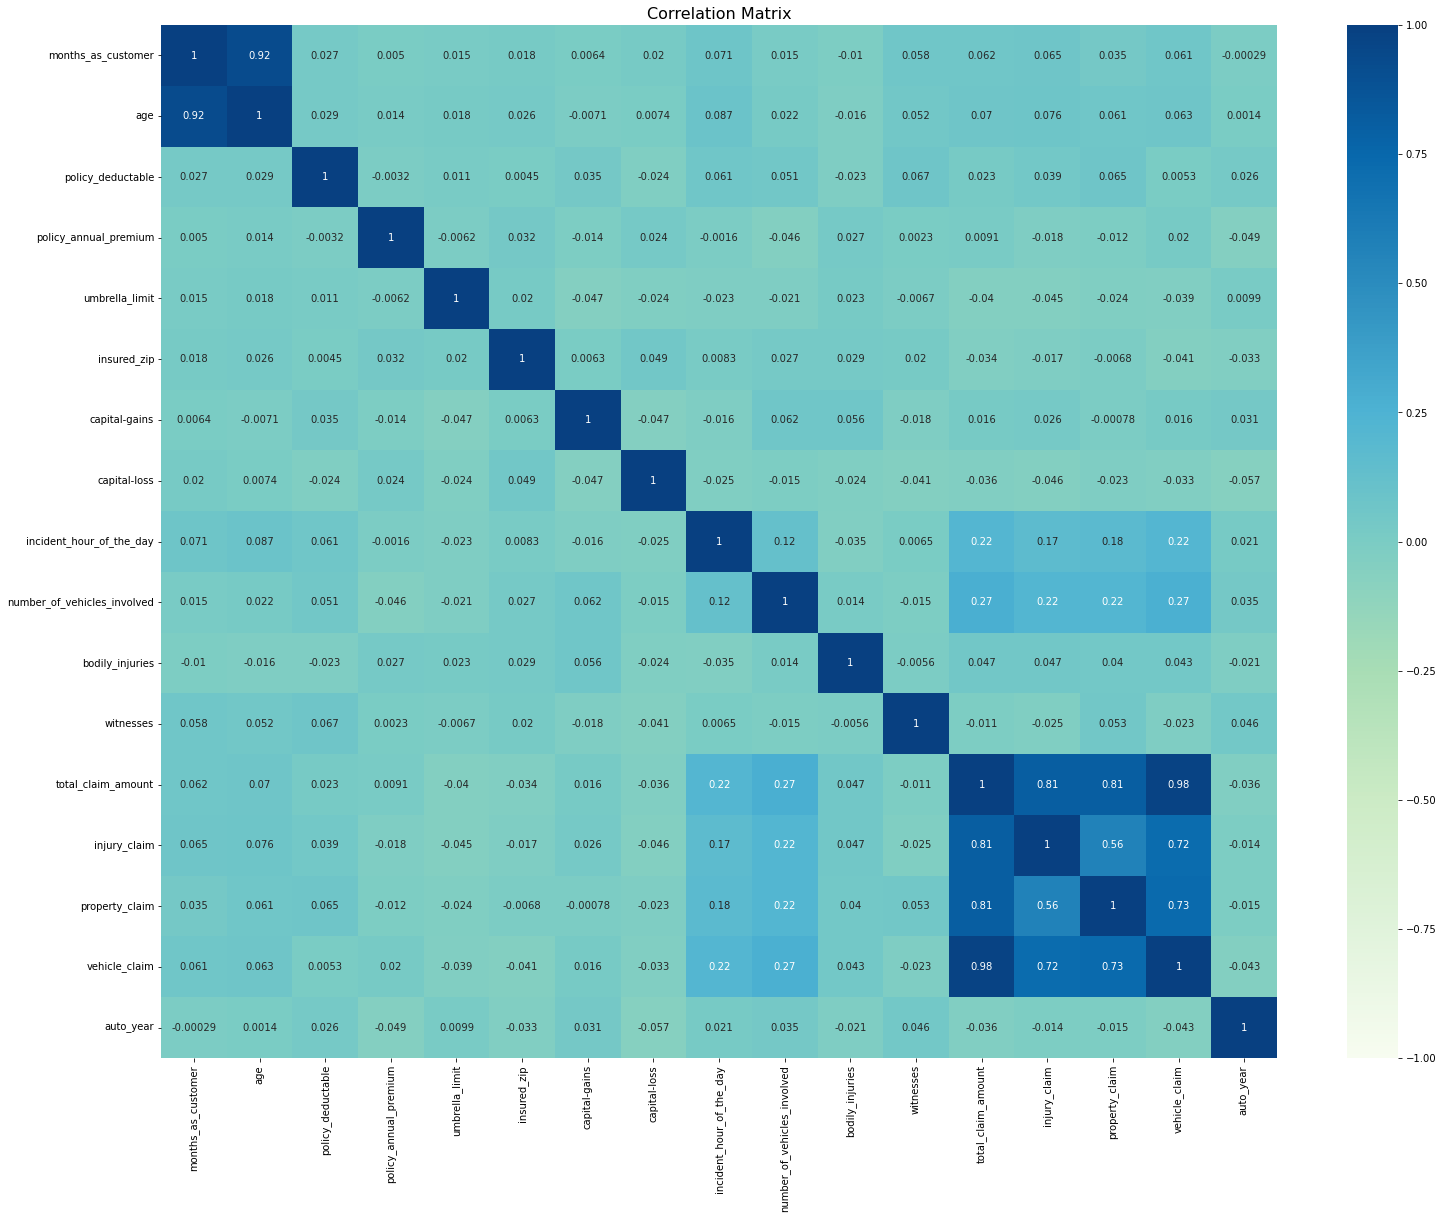

In [36]:
fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,19))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.show()

In [37]:
#Labelizing categorical variables

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat_vars]=df[cat_vars].apply(lb.fit_transform)

In [38]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,colission_type,policy_year,incident_year
0,328,48,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,2,3,0,4,4,1,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1,2,2014,0
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,3,0,1,4,5,5,8,1,1,0,0,1,5070,780,780,3510,8,12,2007,1,1,2006,0
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,2,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,1,2000,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,1,0,4,2,0,5,1,1,1,2,0,63400,6340,6340,50720,3,34,2014,1,0,1990,0
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,3,0,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,1,2014,0


In [39]:
# deleting outliers
Q1 = df[num_vars].quantile(0.25)
Q3 = df[num_vars].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df= df[~((df[num_vars] < (Q1 - 1.5 * IQR)) |(df[num_vars] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df.shape)

Here we will get IQR for each column
 months_as_customer                160.5000
age                                12.0000
policy_deductable                1500.0000
policy_annual_premium             326.0875
umbrella_limit                      0.0000
insured_zip                    154846.5000
capital-gains                   51025.0000
capital-loss                    51500.0000
incident_hour_of_the_day           11.0000
number_of_vehicles_involved         2.0000
bodily_injuries                     2.0000
witnesses                           1.0000
total_claim_amount              28780.0000
injury_claim                     7010.0000
property_claim                   6440.0000
vehicle_claim                   20530.0000
auto_year                          10.0000
dtype: float64


(782, 38)

In [40]:
x=df.drop(['fraud_reported','incident_year'],axis=1)
y=df['fraud_reported']

In [41]:
y.value_counts()

0    600
1    182
Name: fraud_reported, dtype: int64

# resampling

In [42]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# splitting the dataset in to train and test split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.fraud_reported==0]
positive = train_data[train_data.fraud_reported==1]
# upsample minority
pos_upsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([positive, pos_upsampled])
# check new class counts
upsampled.fraud_reported.value_counts()

1    121
0    121
Name: fraud_reported, dtype: int64

In [43]:
x=upsampled.drop('fraud_reported',axis=1)
y=upsampled['fraud_reported']

In [44]:
#Removing skewness
x.skew()
from sklearn.preprocessing import power_transform
x[num_vars]=power_transform(x[num_vars],method='yeo-johnson')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

# split train test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
y_test.value_counts()

1    37
0    36
Name: fraud_reported, dtype: int64

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_x=scaler.fit_transform(x_train)
standardized_xtest=scaler.fit_transform(x_test)
df_standardized = pd.DataFrame(data=standardized_x)
df_standardized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1.483472,1.274350,1.177148,-1.337536,0.175259,0.185339,0.0,0.0,1.017912,-1.566317,1.100230,-1.062586,-0.146943,-0.925287,0.936429,0.808150,-0.733137,-0.948130,1.212183,-1.010363,1.185891,0.578724,-0.831038,1.258515,1.167532,1.263542,-1.157170,-0.852670,-2.244758,-2.302782,-0.264128,-1.248599,-1.182129,-1.524980,-1.315540,0.866787
1,0.311401,0.315690,1.177148,1.216629,1.351270,-0.565805,0.0,0.0,1.017912,-0.563637,-0.907207,-0.157460,0.981845,1.047953,-1.013892,-1.115474,1.218047,-0.948130,1.212183,-1.010363,0.131072,1.098460,1.188325,-0.022744,1.167532,0.492107,-1.157170,0.627373,-0.039046,1.023462,0.650314,1.353583,-0.029383,1.101066,1.284767,-1.055255
2,0.559876,0.537007,-0.035889,1.216629,-1.110973,-1.094503,0.0,0.0,-0.982403,-0.062297,1.602090,-1.243611,0.981845,1.138901,0.936429,-1.115474,1.218047,-0.948130,-0.757614,0.396928,-0.923747,0.310598,0.562766,-0.022744,1.167532,0.492107,0.035280,0.838775,0.169549,1.354442,0.725756,0.643897,0.680000,0.372302,1.284767,0.866787
3,-1.852453,-2.283754,1.177148,-0.060454,0.175259,0.682677,0.0,0.0,-0.982403,0.940384,0.347441,0.928691,-0.146943,-0.925287,-1.036064,0.808150,0.242455,0.113022,-0.757614,-0.072169,0.658482,0.310598,-0.831038,-1.304004,-1.234781,-1.332571,0.035280,0.268204,1.028414,-0.152693,0.167486,-1.485161,0.413981,0.193422,-0.015386,0.592210
4,-0.317530,-0.503881,1.177148,-1.337536,0.175259,-0.840282,0.0,0.0,-0.982403,-0.062297,0.347441,-0.519510,-1.275731,1.086060,-1.046926,-1.115474,1.218047,1.174175,0.555584,1.335122,-0.396337,0.841108,1.535219,-0.022744,1.167532,1.263542,1.227729,0.821919,1.168973,1.137061,0.386074,1.353583,-0.029383,0.015848,1.284767,-0.231522


In [48]:
models= [('lr',LogisticRegression()),('rfc',RandomForestClassifier()),('etc',ExtraTreesClassifier()),('bgc',BaggingClassifier()),
        ('gbc',GradientBoostingClassifier()),('dtc',DecisionTreeClassifier()),('knn',KNeighborsClassifier()),
        ('bnb',BernoulliNB()),('svc',SVC())]

# CROSS VALIDATION

In [49]:
#function to find crossValidation score of different models

def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=-1)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [50]:
basic_model_selection(standardized_x,y_train,10,models)

lr 0.6919117647058824
rfc 0.775
etc 0.7511029411764706
bgc 0.7919117647058823
gbc 0.851470588235294
dtc 0.7867647058823529
knn 0.6448529411764706
bnb 0.7044117647058823
svc 0.6863970588235294


In [51]:
param_test1 = {'n_estimators':range(20,81,10)}
gbc_search= GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy',n_jobs=4,cv=5)
gbc_search.fit(standardized_x,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='accuracy')

In [52]:
gbc_search.best_params_, gbc_search.best_score_

({'n_estimators': 20}, 0.503030303030303)

In [53]:
gbc= GradientBoostingClassifier(max_depth=8,
                                max_features='sqrt',
                                min_samples_leaf=50,
                                min_samples_split=500,
                                random_state=10,
                                subsample=0.8,n_estimators=20)

In [54]:
gbc.fit(standardized_x,y_train)
pred_gbc=gbc.predict(standardized_xtest)

In [55]:
print(accuracy_score(pred_gbc,y_test))
print(classification_report(pred_gbc,y_test))
confusion_matrix(y_test,pred_gbc)

0.4931506849315068
              precision    recall  f1-score   support

           0       1.00      0.49      0.66        73
           1       0.00      0.00      0.00         0

    accuracy                           0.49        73
   macro avg       0.50      0.25      0.33        73
weighted avg       1.00      0.49      0.66        73



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[36,  0],
       [37,  0]], dtype=int64)

In [65]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,accuracy_score,recall_score,roc_auc_score,roc_curve
sm = SMOTE(random_state=42,n_jobs=-1)
X_train, Y_train = sm.fit_resample(standardized_x,y_train)

smote = GradientBoostingClassifier(max_depth=8,
                                max_features='sqrt',
                                min_samples_leaf=50,
                                min_samples_split=500,
                                random_state=10,
                                subsample=0.8,n_estimators=20).fit(X_train,Y_train)

smote_pred = smote.predict(standardized_xtest)

# Checking accuracy
accuracy_score(y_test, smote_pred)

ModuleNotFoundError: No module named 'imblearn'

# Hyper parameter tuning for Bagging Classifier

In [67]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 100, max_features = 0.5),
                   param_grid, scoring = 'accuracy')
clf.fit(standardized_x, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_features=0.5, n_estimators=100),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]},
             scoring='accuracy')

In [68]:
smote_bgc = BaggingClassifier(n_estimators = 100, max_features = 0.5).fit(standardized_x,y_train)

smote_pred_bgc = smote_bgc.predict(standardized_xtest)

# Checking accuracy
accuracy_score(y_test, smote_pred_bgc)

0.7808219178082192

In [69]:
print(accuracy_score(smote_pred_bgc,y_test))
print(classification_report(smote_pred_bgc,y_test))
confusion_matrix(y_test,smote_pred_bgc)

0.7808219178082192
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        36
           1       0.78      0.78      0.78        37

    accuracy                           0.78        73
   macro avg       0.78      0.78      0.78        73
weighted avg       0.78      0.78      0.78        73



array([[28,  8],
       [ 8, 29]], dtype=int64)

In [70]:
predicted_df={"Predicted Loan_Status":smote_pred_bgc,"Original Loan_Status":y_test}
predicted_df=pd.DataFrame(predicted_df)
y_test.value_counts()

1    37
0    36
Name: fraud_reported, dtype: int64

In [71]:
import pickle
filename = 'Insurance.pkl'
pickle.dump(smote_bgc, open(filename, 'wb'))

In [72]:
loaded_model = pickle.load(open('Insurance.pkl', 'rb'))
result = loaded_model.score(standardized_xtest, y_test)
print(result*100)

78.08219178082192


In [73]:
conclusion=pd.DataFrame([loaded_model.predict(standardized_xtest)[:],y_test[:]],index=["Predicted","Original"])

In [74]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Predicted,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1
Original,1,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1


## conclusion:
### we got our predicted values which are very much in sinc with the Original values.so we can get this model loaded to production. but still there is a scope for improvement of accuracy score by using the particular parameter which increases the model performance